In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers, callbacks
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

---
# Завантажуємо датасет
---

In [3]:
# Завантаження датасету Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 1. Нормалізація пікселів (0-255 -> 0-1)
x_train, x_test = (x_train / 255.0).astype("float32"), (x_test / 255.0).astype("float32")

# 2. Поділ на train/val (10 % для валідації)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=SEED, stratify=y_train
)


# 3. Функція для графіків
def plot_history(h, title=""):
    plt.plot(h.history["loss"], label="train loss")
    plt.plot(h.history["val_loss"], label="val loss")
    plt.plot(h.history["accuracy"], label="train acc")
    plt.plot(h.history["val_accuracy"], label="val acc")
    plt.title(title)
    plt.xlabel("epoch")
    plt.legend()
    plt.show()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(54000, 28, 28) (54000,)
(10000, 28, 28) (10000,)
(6000, 28, 28) (6000,)


In [5]:
# Список назв класів
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Виведення назви класу для першого зображення
index = 0  # Індекс зображення
print(f"Мітка: {y_train[index]}, Назва класу: {class_names[y_train[index]]}")

Мітка: 8, Назва класу: Bag


---
# Візуалізуємо зображення з нашого датасету:
---

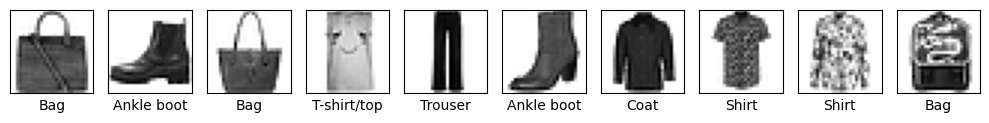

In [6]:
plt.figure(figsize=(10, 10))
# Цикл для відображення перших 10 зображень
for i in range(10):
    plt.subplot(1, 10, i + 1)

    # Видалення осей (ticks) для кращої візуалізації
    plt.xticks([])
    plt.yticks([])

    # Відображення зображення у градаціях сірого (чорно-білий режим)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    # Додавання підпису з назвою класу під зображенням
    plt.xlabel(class_names[y_train[i]])

# Показ всіх створених графіків
plt.tight_layout()  # Автоматичне регулювання відступів
plt.show()

---
Build and Optimize
---

### 1  Базова модель

Epoch 1/10
422/422 - 1s - 2ms/step - accuracy: 0.8045 - loss: 0.5703 - val_accuracy: 0.8483 - val_loss: 0.4348
Epoch 2/10
422/422 - 1s - 1ms/step - accuracy: 0.8540 - loss: 0.4155 - val_accuracy: 0.8657 - val_loss: 0.3788
Epoch 3/10
422/422 - 1s - 1ms/step - accuracy: 0.8665 - loss: 0.3741 - val_accuracy: 0.8742 - val_loss: 0.3526
Epoch 4/10
422/422 - 1s - 1ms/step - accuracy: 0.8751 - loss: 0.3473 - val_accuracy: 0.8763 - val_loss: 0.3378
Epoch 5/10
422/422 - 1s - 1ms/step - accuracy: 0.8814 - loss: 0.3271 - val_accuracy: 0.8805 - val_loss: 0.3273
Epoch 6/10
422/422 - 1s - 1ms/step - accuracy: 0.8866 - loss: 0.3112 - val_accuracy: 0.8830 - val_loss: 0.3215
Epoch 7/10
422/422 - 1s - 1ms/step - accuracy: 0.8913 - loss: 0.2976 - val_accuracy: 0.8875 - val_loss: 0.3110
Epoch 8/10
422/422 - 1s - 1ms/step - accuracy: 0.8952 - loss: 0.2864 - val_accuracy: 0.8903 - val_loss: 0.3069
Epoch 9/10
422/422 - 1s - 1ms/step - accuracy: 0.8989 - loss: 0.2765 - val_accuracy: 0.8898 - val_loss: 0.3069
E

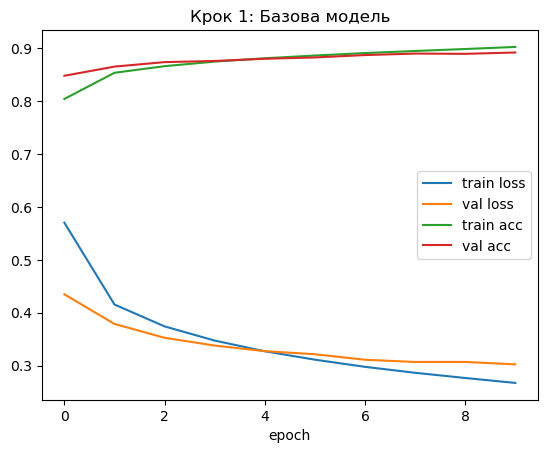

In [9]:
m1 = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

m1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

h1 = m1.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2,
)

plot_history(h1, "Крок 1: Базова модель")

### 2  Більше шарів і параметрів

Epoch 1/15
422/422 - 2s - 4ms/step - accuracy: 0.8128 - loss: 0.5348 - val_accuracy: 0.8428 - val_loss: 0.4407
Epoch 2/15
422/422 - 1s - 2ms/step - accuracy: 0.8629 - loss: 0.3781 - val_accuracy: 0.8690 - val_loss: 0.3639
Epoch 3/15
422/422 - 1s - 2ms/step - accuracy: 0.8766 - loss: 0.3380 - val_accuracy: 0.8783 - val_loss: 0.3429
Epoch 4/15
422/422 - 1s - 2ms/step - accuracy: 0.8843 - loss: 0.3108 - val_accuracy: 0.8800 - val_loss: 0.3284
Epoch 5/15
422/422 - 1s - 2ms/step - accuracy: 0.8914 - loss: 0.2922 - val_accuracy: 0.8763 - val_loss: 0.3285
Epoch 6/15
422/422 - 1s - 2ms/step - accuracy: 0.8976 - loss: 0.2749 - val_accuracy: 0.8802 - val_loss: 0.3252
Epoch 7/15
422/422 - 1s - 2ms/step - accuracy: 0.9018 - loss: 0.2625 - val_accuracy: 0.8817 - val_loss: 0.3222
Epoch 8/15
422/422 - 1s - 2ms/step - accuracy: 0.9055 - loss: 0.2493 - val_accuracy: 0.8813 - val_loss: 0.3242
Epoch 9/15
422/422 - 1s - 2ms/step - accuracy: 0.9093 - loss: 0.2414 - val_accuracy: 0.8873 - val_loss: 0.3144
E

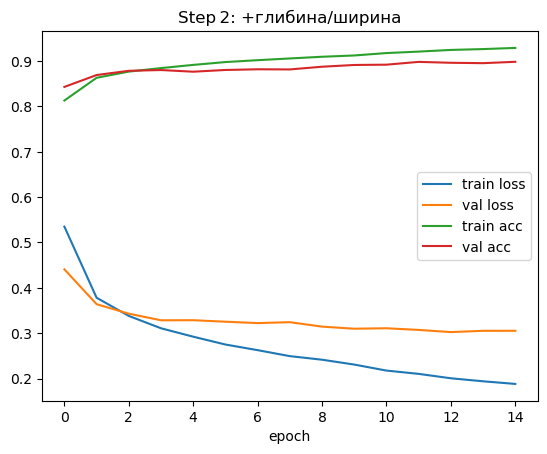

In [12]:
m2 = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

m2.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

h2 = m2.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2,
)

plot_history(h2, "Step 2: +глибина/ширина")

### 3  Dropout 0.5

Epoch 1/20
422/422 - 2s - 4ms/step - accuracy: 0.7769 - loss: 0.6165 - val_accuracy: 0.8560 - val_loss: 0.3984
Epoch 2/20
422/422 - 1s - 3ms/step - accuracy: 0.8465 - loss: 0.4231 - val_accuracy: 0.8695 - val_loss: 0.3579
Epoch 3/20
422/422 - 1s - 3ms/step - accuracy: 0.8598 - loss: 0.3833 - val_accuracy: 0.8732 - val_loss: 0.3412
Epoch 4/20
422/422 - 1s - 2ms/step - accuracy: 0.8685 - loss: 0.3562 - val_accuracy: 0.8852 - val_loss: 0.3169
Epoch 5/20
422/422 - 1s - 2ms/step - accuracy: 0.8735 - loss: 0.3410 - val_accuracy: 0.8898 - val_loss: 0.3067
Epoch 6/20
422/422 - 1s - 2ms/step - accuracy: 0.8795 - loss: 0.3267 - val_accuracy: 0.8897 - val_loss: 0.2989
Epoch 7/20
422/422 - 1s - 2ms/step - accuracy: 0.8830 - loss: 0.3143 - val_accuracy: 0.8940 - val_loss: 0.2919
Epoch 8/20
422/422 - 1s - 2ms/step - accuracy: 0.8860 - loss: 0.3041 - val_accuracy: 0.8923 - val_loss: 0.2926
Epoch 9/20
422/422 - 1s - 2ms/step - accuracy: 0.8892 - loss: 0.2935 - val_accuracy: 0.8907 - val_loss: 0.2914
E

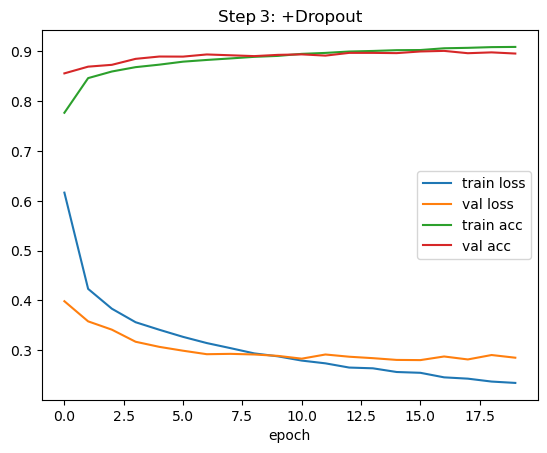

In [14]:
m3 = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

m3.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

h3 = m3.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2,
)

plot_history(h3, "Step 3: +Dropout")

### 4  Batch Normalization після кожного Dense

Epoch 1/25
422/422 - 2s - 6ms/step - accuracy: 0.8075 - loss: 0.5408 - val_accuracy: 0.8302 - val_loss: 0.4552
Epoch 2/25
422/422 - 1s - 3ms/step - accuracy: 0.8504 - loss: 0.4116 - val_accuracy: 0.8525 - val_loss: 0.4041
Epoch 3/25
422/422 - 1s - 3ms/step - accuracy: 0.8605 - loss: 0.3807 - val_accuracy: 0.8785 - val_loss: 0.3379
Epoch 4/25
422/422 - 1s - 3ms/step - accuracy: 0.8693 - loss: 0.3569 - val_accuracy: 0.8708 - val_loss: 0.3430
Epoch 5/25
422/422 - 1s - 3ms/step - accuracy: 0.8727 - loss: 0.3445 - val_accuracy: 0.8840 - val_loss: 0.3183
Epoch 6/25
422/422 - 1s - 3ms/step - accuracy: 0.8741 - loss: 0.3404 - val_accuracy: 0.8787 - val_loss: 0.3321
Epoch 7/25
422/422 - 1s - 3ms/step - accuracy: 0.8779 - loss: 0.3280 - val_accuracy: 0.8847 - val_loss: 0.3163
Epoch 8/25
422/422 - 1s - 3ms/step - accuracy: 0.8798 - loss: 0.3200 - val_accuracy: 0.8797 - val_loss: 0.3258
Epoch 9/25
422/422 - 1s - 3ms/step - accuracy: 0.8860 - loss: 0.3094 - val_accuracy: 0.8862 - val_loss: 0.3103
E

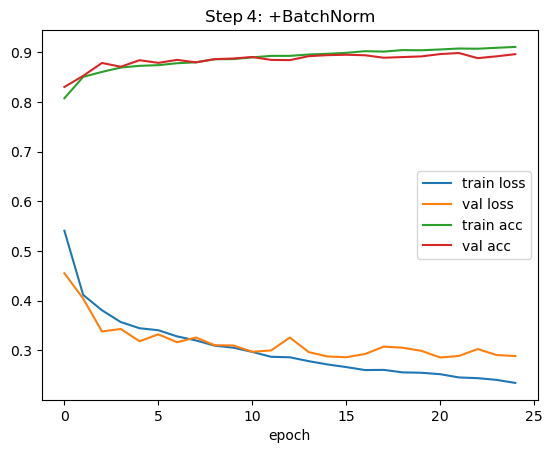

In [15]:
m4 = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

m4.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

h4 = m4.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2,
)

plot_history(h4, "Step 4: +BatchNorm")

### 5  L2‑регуляризація ваг (weight decay)

Epoch 1/30
422/422 - 3s - 6ms/step - accuracy: 0.8104 - loss: 0.5993 - val_accuracy: 0.8185 - val_loss: 0.5229
Epoch 2/30
422/422 - 1s - 3ms/step - accuracy: 0.8505 - loss: 0.4749 - val_accuracy: 0.8187 - val_loss: 0.5538
Epoch 3/30
422/422 - 1s - 3ms/step - accuracy: 0.8593 - loss: 0.4449 - val_accuracy: 0.8595 - val_loss: 0.4441
Epoch 4/30
422/422 - 1s - 3ms/step - accuracy: 0.8656 - loss: 0.4254 - val_accuracy: 0.8680 - val_loss: 0.4116
Epoch 5/30
422/422 - 1s - 3ms/step - accuracy: 0.8721 - loss: 0.4092 - val_accuracy: 0.8652 - val_loss: 0.4230
Epoch 6/30
422/422 - 1s - 3ms/step - accuracy: 0.8752 - loss: 0.3955 - val_accuracy: 0.8678 - val_loss: 0.4134
Epoch 7/30
422/422 - 1s - 3ms/step - accuracy: 0.8781 - loss: 0.3888 - val_accuracy: 0.8735 - val_loss: 0.4053
Epoch 8/30
422/422 - 1s - 3ms/step - accuracy: 0.8791 - loss: 0.3828 - val_accuracy: 0.8753 - val_loss: 0.3950
Epoch 9/30
422/422 - 1s - 3ms/step - accuracy: 0.8801 - loss: 0.3782 - val_accuracy: 0.8725 - val_loss: 0.4010
E

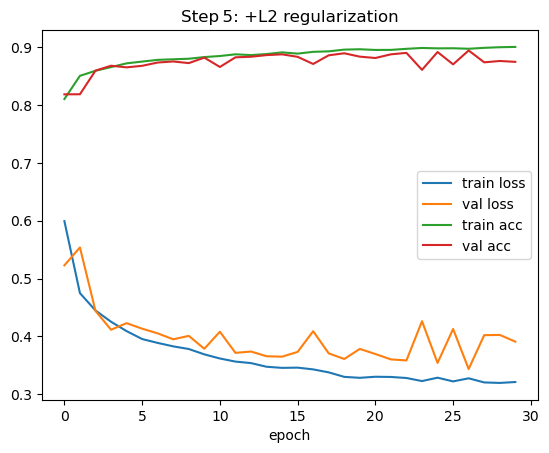

In [19]:
l2_val = 1e-4
m5 = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(
            256, activation="relu", kernel_regularizer=regularizers.l2(l2_val)
        ),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(
            128, activation="relu", kernel_regularizer=regularizers.l2(l2_val)
        ),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2_val)),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

m5.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

h5 = m5.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2,
)

plot_history(h5, "Step 5: +L2 regularization")

### Остання модель з усіма покращеннями

In [23]:
def make_mlp():
    inputs = keras.Input(shape=(28, 28), name="img")

    block = keras.Sequential(
        [
            layers.Flatten(),
            layers.Dense(256, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(64, activation="relu"),
        ],
        name="feature_block",
    )

    x = block(inputs)  # ←  проганяємо inputs через блок
    outputs = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="mlp_relu_seq")


model = make_mlp()
model.summary()

# 3. Компіляція
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# 4. Колбеки
cb = [
    callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=6,
        restore_best_weights=True,
    ),
    callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-5,
        verbose=1,
    ),
]

# 5. Навчання
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=60,
    batch_size=128,
    callbacks=cb,
    verbose=2,
)

# 6. Оцінка
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Тестова точність: {test_acc:.3%}")

Model: "mlp_relu_seq"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_block (Sequential)      │ (None, 64)             │       242,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
422/422 - 2s - 4ms/step - accuracy: 0.7809 - loss: 0.6122 - val_accuracy: 0.8492 - val_loss: 0.4102 - learning_rate: 0.0010
Epoch 2/60
422/422 - 1s - 2ms/step - accuracy: 0.8474 - loss: 0.4208 - val_accuracy: 0.8618 - val_loss: 0.3829 - learning_rate: 0.0010
Epoch 3/60
422/422 - 1s - 2ms/step - accuracy: 0.8634 - loss: 0.3790 - val_accuracy: 0.8712 - val_loss: 0.3550 - learning_rate: 0.0010
Epoch 4/60
422/422 - 1s - 2ms/step - accuracy: 0.8692 - loss: 0.3560 - val_accuracy: 0.8828 - val_loss: 0.3202 - learning_rate: 0.0010
Epoch 5/60
422/422 - 1s - 2ms/step - accuracy: 0.8751 - loss: 0.3374 - val_accuracy: 0.8852 - val_loss: 0.3106 - learning_rate: 0.0010
Epoch 6/60
422/422 - 1s - 2ms/step - accuracy: 0.8789 - loss: 0.3256 - val_accuracy: 0.8818 - val_loss: 0.3194 - learning_rate: 0.0010
Epoch 7/60
422/422 - 1s - 2ms/step - accuracy: 0.8841 - loss: 0.3119 - val_accuracy: 0.8905 - val_loss: 0.2983 - learning_rate: 0.0010
Epoch 8/60
422/422 - 1s - 2ms/step - accuracy: 0.8877 -